In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

> ## Read SCV

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")
df

customerID  gender  SeniorCitizen  tenure  ServiceCount        Contract  \
0     7590-VHVEG  Female              0       1             2  Month-to-month   
1     5575-GNVDE    Male              0      34             4        One year   
2     3668-QPYBK    Male              0       2             4  Month-to-month   
3     7795-CFOCW    Male              0      45             4        One year   
4     9237-HQITU  Female              0       2             2  Month-to-month   
...          ...     ...            ...     ...           ...             ...   
7038  6840-RESVB    Male              0      24             8        One year   
7039  2234-XADUH  Female              0      72             7        One year   
7040  4801-JZAZL  Female              0      11             2  Month-to-month   
7041  8361-LTMKD    Male              1       4             3  Month-to-month   
7042  3186-AJIEK    Male              0      66             7        Two year   

     PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0                 Yes           29.85         29.85    No  
1                  No           56.95       1889.50    No  
2                 Yes           53.85        108.15   Yes  
3                  No           42.30       1840.75    No  
4                 Yes           70.70        151.65   Yes  
...               ...             ...           ...   ...  
7038              Yes           84.80       1990.50    No  
7039              Yes          103.20       7362.90    No  
7040              Yes           29.60        346.45    No  
7041              Yes           74.40        306.60   Yes  
7042              Yes          105.65       6844.50    No  

[7043 rows x 10 columns]

In [3]:
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

> ## Data exploation & Cleaning 

In [4]:
df = df.drop(['customerID','SeniorCitizen'], axis=1)

In [5]:
df

gender  tenure  ServiceCount        Contract PaperlessBilling  \
0     Female       1             2  Month-to-month              Yes   
1       Male      34             4        One year               No   
2       Male       2             4  Month-to-month              Yes   
3       Male      45             4        One year               No   
4     Female       2             2  Month-to-month              Yes   
...      ...     ...           ...             ...              ...   
7038    Male      24             8        One year              Yes   
7039  Female      72             7        One year              Yes   
7040  Female      11             2  Month-to-month              Yes   
7041    Male       4             3  Month-to-month              Yes   
7042    Male      66             7        Two year              Yes   

      MonthlyCharges  TotalCharges Churn  
0              29.85         29.85    No  
1              56.95       1889.50    No  
2              53.85        108.15   Yes  
3              42.30       1840.75    No  
4              70.70        151.65   Yes  
...              ...           ...   ...  
7038           84.80       1990.50    No  
7039          103.20       7362.90    No  
7040           29.60        346.45    No  
7041           74.40        306.60   Yes  
7042          105.65       6844.50    No  

[7043 rows x 8 columns]

> ### หากแสดง null data พบว่ามีแค่ feature TotalCharges ที่มีค่า null

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   ServiceCount      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7016 non-null   float64
 7   Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 440.3+ KB


In [7]:
null_data = df[df.isnull().any(axis=1)]

In [8]:
null_data.head()

gender  tenure  ServiceCount  Contract PaperlessBilling  MonthlyCharges  \
431   Female      72             7  Two year              Yes           65.20   
488   Female       0             5  Two year              Yes           52.55   
753     Male       0             7  Two year               No           20.25   
936   Female       0             7  Two year               No           80.85   
1082    Male       0             8  Two year               No           25.75   

      TotalCharges Churn  
431            NaN    No  
488            NaN    No  
753            NaN    No  
936            NaN    No  
1082           NaN    No

In [9]:
df.describe()

tenure  ServiceCount  MonthlyCharges  TotalCharges
count  7043.000000   7043.000000     7043.000000   7016.000000
mean     32.371149      5.446259       64.761692   2282.589168
std      24.559481      1.964916       30.090047   2265.506114
min       0.000000      1.000000       18.250000     18.800000
25%       9.000000      4.000000       35.500000    401.925000
50%      29.000000      6.000000       70.350000   1397.100000
75%      55.000000      7.000000       89.850000   3792.325000
max      72.000000      9.000000      118.750000   8684.800000

> #### fill na with median()

In [10]:
df.fillna(df.median(),inplace=True)

In [11]:
df.describe()

tenure  ServiceCount  MonthlyCharges  TotalCharges
count  7043.000000   7043.000000     7043.000000   7043.000000
mean     32.371149      5.446259       64.761692   2279.194562
std      24.559481      1.964916       30.090047   2261.820939
min       0.000000      1.000000       18.250000     18.800000
25%       9.000000      4.000000       35.500000    403.775000
50%      29.000000      6.000000       70.350000   1397.100000
75%      55.000000      7.000000       89.850000   3778.050000
max      72.000000      9.000000      118.750000   8684.800000

In [12]:
afterFillNa = df[df.isnull().any(axis=1)]
afterFillNa

Empty DataFrame
Columns: [gender, tenure, ServiceCount, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

>> #### Affter Fill NaN value with Median(

> # Find  highly Correlation of features

In [13]:
interesting_fe = df[['tenure','ServiceCount', 'MonthlyCharges','TotalCharges']]
interesting_fe

tenure  ServiceCount  MonthlyCharges  TotalCharges
0          1             2           29.85         29.85
1         34             4           56.95       1889.50
2          2             4           53.85        108.15
3         45             4           42.30       1840.75
4          2             2           70.70        151.65
...      ...           ...             ...           ...
7038      24             8           84.80       1990.50
7039      72             7          103.20       7362.90
7040      11             2           29.60        346.45
7041       4             3           74.40        306.60
7042      66             7          105.65       6844.50

[7043 rows x 4 columns]

In [14]:
interesting_fe.corr()

tenure  ServiceCount  MonthlyCharges  TotalCharges
tenure          1.000000      0.508526        0.247900      0.824067
ServiceCount    0.508526      1.000000        0.041463      0.442010
MonthlyCharges  0.247900      0.041463        1.000000      0.649631
TotalCharges    0.824067      0.442010        0.649631      1.000000

<AxesSubplot:>

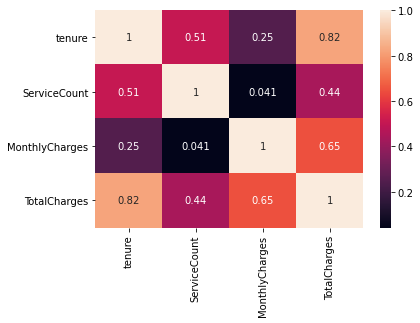

In [15]:
sns.heatmap(interesting_fe.corr(),annot=True )

In [16]:
lower_cor = pd.DataFrame(np.tril(interesting_fe.corr(), -1), columns = interesting_fe.corr().columns)
lower_cor

tenure  ServiceCount  MonthlyCharges  TotalCharges
0  0.000000      0.000000        0.000000           0.0
1  0.508526      0.000000        0.000000           0.0
2  0.247900      0.041463        0.000000           0.0
3  0.824067      0.442010        0.649631           0.0

# เลือก feat. ที่มี highly correlation 
# จากนั้น list ออกมา
# df คือ interesting df ไม่ใช่ df ทั้งหมด

def correlation (interesting_df , threshold):
    feature_corr = set() #set ของ features
    corr_matrix = interesting_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix)) :
            if (corr_matrix.iloc[i, j]) >  threshold and corr_matrix.iloc[i, j] != 1  : 
                print((corr_matrix.columns[i] , corr_matrix.iloc[i, j]) ,">" ,threshold)
                colname=corr_matrix.columns[i]
                feature_corr.add(colname)
    return feature_corr

In [17]:
# correlation_features=correlation(lower_cor, 0.60)

In [18]:
to_drop = [column for column in lower_cor if any(lower_cor[column] > 0.6)]
to_drop

['tenure', 'MonthlyCharges']

In [19]:
interesting_fe = interesting_fe.drop(to_drop,axis=1)

In [20]:
interesting_fe

ServiceCount  TotalCharges
0                2         29.85
1                4       1889.50
2                4        108.15
3                4       1840.75
4                2        151.65
...            ...           ...
7038             8       1990.50
7039             7       7362.90
7040             2        346.45
7041             3        306.60
7042             7       6844.50

[7043 rows x 2 columns]

In [21]:
df = df.drop(to_drop,axis=1)

In [22]:
df

gender  ServiceCount        Contract PaperlessBilling  TotalCharges  \
0     Female             2  Month-to-month              Yes         29.85   
1       Male             4        One year               No       1889.50   
2       Male             4  Month-to-month              Yes        108.15   
3       Male             4        One year               No       1840.75   
4     Female             2  Month-to-month              Yes        151.65   
...      ...           ...             ...              ...           ...   
7038    Male             8        One year              Yes       1990.50   
7039  Female             7        One year              Yes       7362.90   
7040  Female             2  Month-to-month              Yes        346.45   
7041    Male             3  Month-to-month              Yes        306.60   
7042    Male             7        Two year              Yes       6844.50   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 6 columns]

> # Remove Variable with High p-value from Chi-square

In [23]:
le = preprocessing.LabelEncoder()

In [24]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [27]:
df['gender'] = le.fit_transform(df['gender'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['Churn'] = le.fit_transform(df['Churn'])

In [28]:
df

gender  ServiceCount  Contract  PaperlessBilling  TotalCharges  Churn
0          0             2         0                 1         29.85      0
1          1             4         1                 0       1889.50      0
2          1             4         0                 1        108.15      1
3          1             4         1                 0       1840.75      0
4          0             2         0                 1        151.65      1
...      ...           ...       ...               ...           ...    ...
7038       1             8         1                 1       1990.50      0
7039       0             7         1                 1       7362.90      0
7040       0             2         0                 1        346.45      0
7041       1             3         0                 1        306.60      1
7042       1             7         2                 1       6844.50      0

[7043 rows x 6 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   ServiceCount      7043 non-null   int64  
 2   Contract          7043 non-null   int32  
 3   PaperlessBilling  7043 non-null   int32  
 4   TotalCharges      7043 non-null   float64
 5   Churn             7043 non-null   int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 220.2 KB


In [30]:
Output = df['Churn']
Variables = df[['gender','Contract','PaperlessBilling']]
Chi_table = chi2(Variables,Output)

In [31]:
Chi_table

(array([2.58698618e-01, 1.11578017e+03, 1.05680863e+02]),
 array([6.11015635e-001, 1.22794132e-244, 8.66198711e-025]))

In [32]:
p_value = Chi_table[1]
p_value

array([6.11015635e-001, 1.22794132e-244, 8.66198711e-025])

In [33]:
lower_chi = pd.DataFrame(np.array([p_value]) , columns=Variables.columns)
lower_chi

gender       Contract  PaperlessBilling
0  0.611016  1.227941e-244      8.661987e-25

In [34]:
droping_fe = [column for column in lower_chi if any(lower_chi[column] > 0.05)]
droping_fe

['gender']

In [35]:
df = df.drop(droping_fe ,axis=1)
df

ServiceCount  Contract  PaperlessBilling  TotalCharges  Churn
0                2         0                 1         29.85      0
1                4         1                 0       1889.50      0
2                4         0                 1        108.15      1
3                4         1                 0       1840.75      0
4                2         0                 1        151.65      1
...            ...       ...               ...           ...    ...
7038             8         1                 1       1990.50      0
7039             7         1                 1       7362.90      0
7040             2         0                 1        346.45      0
7041             3         0                 1        306.60      1
7042             7         2                 1       6844.50      0

[7043 rows x 5 columns]